In [ ]:
# RestNet(Skip connection, Regidual Block)  잔차를 레이어에 더해준다

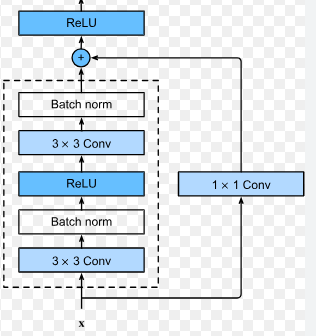

In [4]:
# conv - batchn - Relu - conv -batchn 
import torch.nn as nn
import torch
conv1 = nn.Conv2d(3,32,kernel_size=3,padding=1)
batch1 = nn.BatchNorm2d(32)
relu = nn.ReLU()
conv2 = nn.Conv2d(32,64,kernel_size=3,padding=1)
batch2 = nn.BatchNorm2d(64)

x = torch.randn(2,3,32,32)
x_ = x  # 스킵커넥션을 위해서 초기 입력을 저장

x = conv1(x)
x = batch1(x)
x = relu(x)
x = conv2(x)
x = batch2(x)
x.size() , x_.size()


(torch.Size([2, 64, 32, 32]), torch.Size([2, 3, 32, 32]))

In [5]:
downsample = nn.Conv2d(3,64,kernel_size=1)
down_x = downsample(x_)
down_x.size()


torch.Size([2, 64, 32, 32])

In [ ]:
import torch
import torch.nn as nn
class BasicBlock(nn.Module):
    def __init__(self, in_channel,out_channel,hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channel,hidden_dim,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(hidden_dim,out_channel,kernel_size=3,padding=1)
        self.batch1 = nn.BatchNorm2d(hidden_dim)
        self.batch2 = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()
        self.downsample = nn.Conv2d(in_channel,out_channel,kernel_size=1)
    def forward(self, x):
        x_ = x
        x = self.relu(self.batch1(self.conv1(x)))
        x = self.batch2(self.conv2(x))
        x += x_
        out = self.relu(x)
        return out

In [6]:
class ResNet(nn.Module):
    def __init__(self, class_num = 10):
        super(ResNet,self).__init__()
        self.b1 = BasicBlock(3,64,32) 
        self.b2 = BasicBlock(64,256,128)
        self.b3 = BasicBlock(256,256)

        self.pool = nn.AvgPool2d(2)

        self.fc1 = nn.Linear(256*32*32 , 2048)
        self.fc2 = nn.Linear(2048 , 512)
        self.fc3 = nn.Linear(2048 , class_num)

        self.relu = nn.Relu()
    def forward(self,x):
        x = self.pool(self.b1(x))
        x = self.pool(self.b2(x))
        x = self.pool(self.b3(x))
        x = torch.flatten(x, start_dim=1)

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)

        return out


In [ ]:
# 데이터는 인간 - 말
# 학습 - 평가